In [3]:
import pandas as pd
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [4]:
df_2015= pd.read_csv("C:/Users/valen/OneDrive/Documentos/ETL/workshop_3/Workshop_3/data/2015.csv")
df_2016= pd.read_csv("C:/Users/valen/OneDrive/Documentos/ETL/workshop_3/Workshop_3/data/2016.csv")
df_2017= pd.read_csv("C:/Users/valen/OneDrive/Documentos/ETL/workshop_3/Workshop_3/data/2017.csv")
df_2018= pd.read_csv("C:/Users/valen/OneDrive/Documentos/ETL/workshop_3/Workshop_3/data/2018.csv")
df_2019= pd.read_csv("C:/Users/valen/OneDrive/Documentos/ETL/workshop_3/Workshop_3/data/2019.csv")

Let's check if there are any missing values:

In [5]:
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019]
df_names = ["2015", "2016", "2017", "2018", "2019"]

nulls_info = []

for name, df in zip(df_names, dfs):
    nulls = df.isnull().sum()
    nulls_info.append(pd.DataFrame({
        'Dataset': name,
        'Column': nulls.index,
        'Null Count': nulls.values,
        'Has Nulls': nulls.values > 0
    }))

nulls_info_df = pd.concat(nulls_info, ignore_index=True)

print(nulls_info_df)

   Dataset                         Column  Null Count  Has Nulls
0     2015                        Country           0      False
1     2015                         Region           0      False
2     2015                 Happiness Rank           0      False
3     2015                Happiness Score           0      False
4     2015                 Standard Error           0      False
5     2015       Economy (GDP per Capita)           0      False
6     2015                         Family           0      False
7     2015       Health (Life Expectancy)           0      False
8     2015                        Freedom           0      False
9     2015  Trust (Government Corruption)           0      False
10    2015                     Generosity           0      False
11    2015              Dystopia Residual           0      False
12    2016                        Country           0      False
13    2016                         Region           0      False
14    2016               

I noticed there is one missing value in the 2018's dataset. Let's see the specific row for that NAN:

In [6]:
null_value_row = df_2018[df_2018['Perceptions of corruption'].isnull()]

null_value_row

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


United Arab Emirates is the country that has the null value, we are going to replace it with 0.182 which is given by The World Happiness Report in 2018.

In [7]:
df_2018.loc[df_2018['Country or region'] == 'United Arab Emirates', 'Perceptions of corruption'] = df_2018.loc[df_2018['Country or region'] == 'United Arab Emirates', 'Perceptions of corruption'].fillna(0.182)

print(df_2018[df_2018['Country or region'] == 'United Arab Emirates'])

    Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                      0.182  


In [8]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Free of missing values.

### Statistics Overview

In [9]:
def basic_stats_and_visuals(df, year):
    print(f"Análisis estadístico básico para {year}:")
    print(df.describe())  
    
    df.hist(bins=20, figsize=(20, 15))
    plt.suptitle(f'Distribución de variables numéricas en {year}')
    plt.show()

Análisis estadístico básico para 2015:
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   


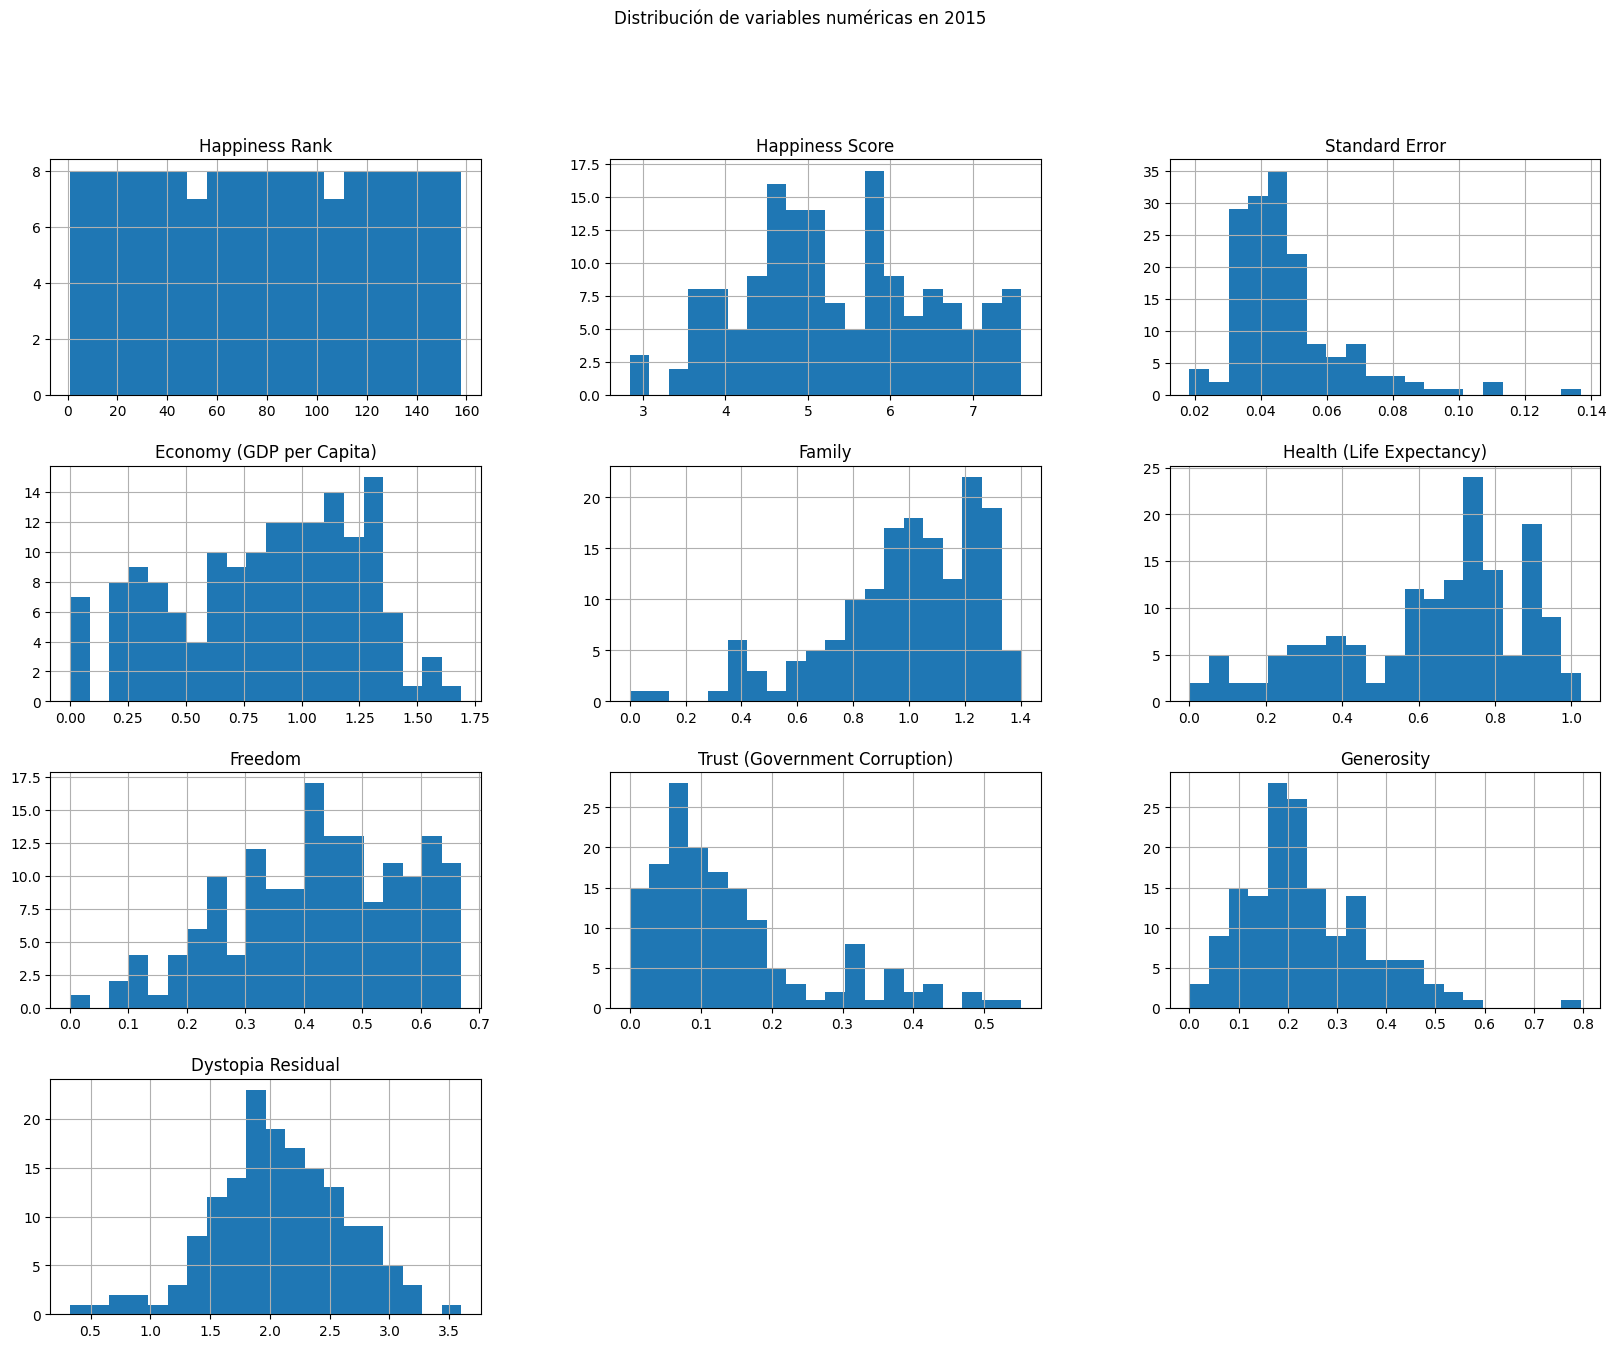

In [10]:
basic_stats_and_visuals(df_2015, "2015")

The histograms from the World Happiness Report 2015 provide an interesting look at how various well-being indicators are distributed across different countries. The happiness scores are slightly skewed to the left, with most countries scoring between 4 and 6. This suggests that a moderate level of happiness is fairly common. In terms of economic prosperity and health outcomes, represented by GDP per capita and life expectancy, respectively, the bimodal distributions indicate notable disparities among countries, with distinct groups at different levels of wealth and health.

When examining family support and perceived freedom, we see significant variations. Family support scores show a bimodal distribution, while freedom scores are left-skewed, indicating that moderate freedom levels are more typical. Trust in government, as measured by perceived corruption, and generosity are both right-skewed, meaning that lower levels of trust and generosity are more prevalent. The dystopia residual, which serves as a baseline measure, follows a normal distribution centered around 2.0, suggesting a balanced spread of these scores. These distributions together highlight the diverse range of well-being and societal conditions across different nations.

Análisis estadístico básico para 2016:
       Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000           

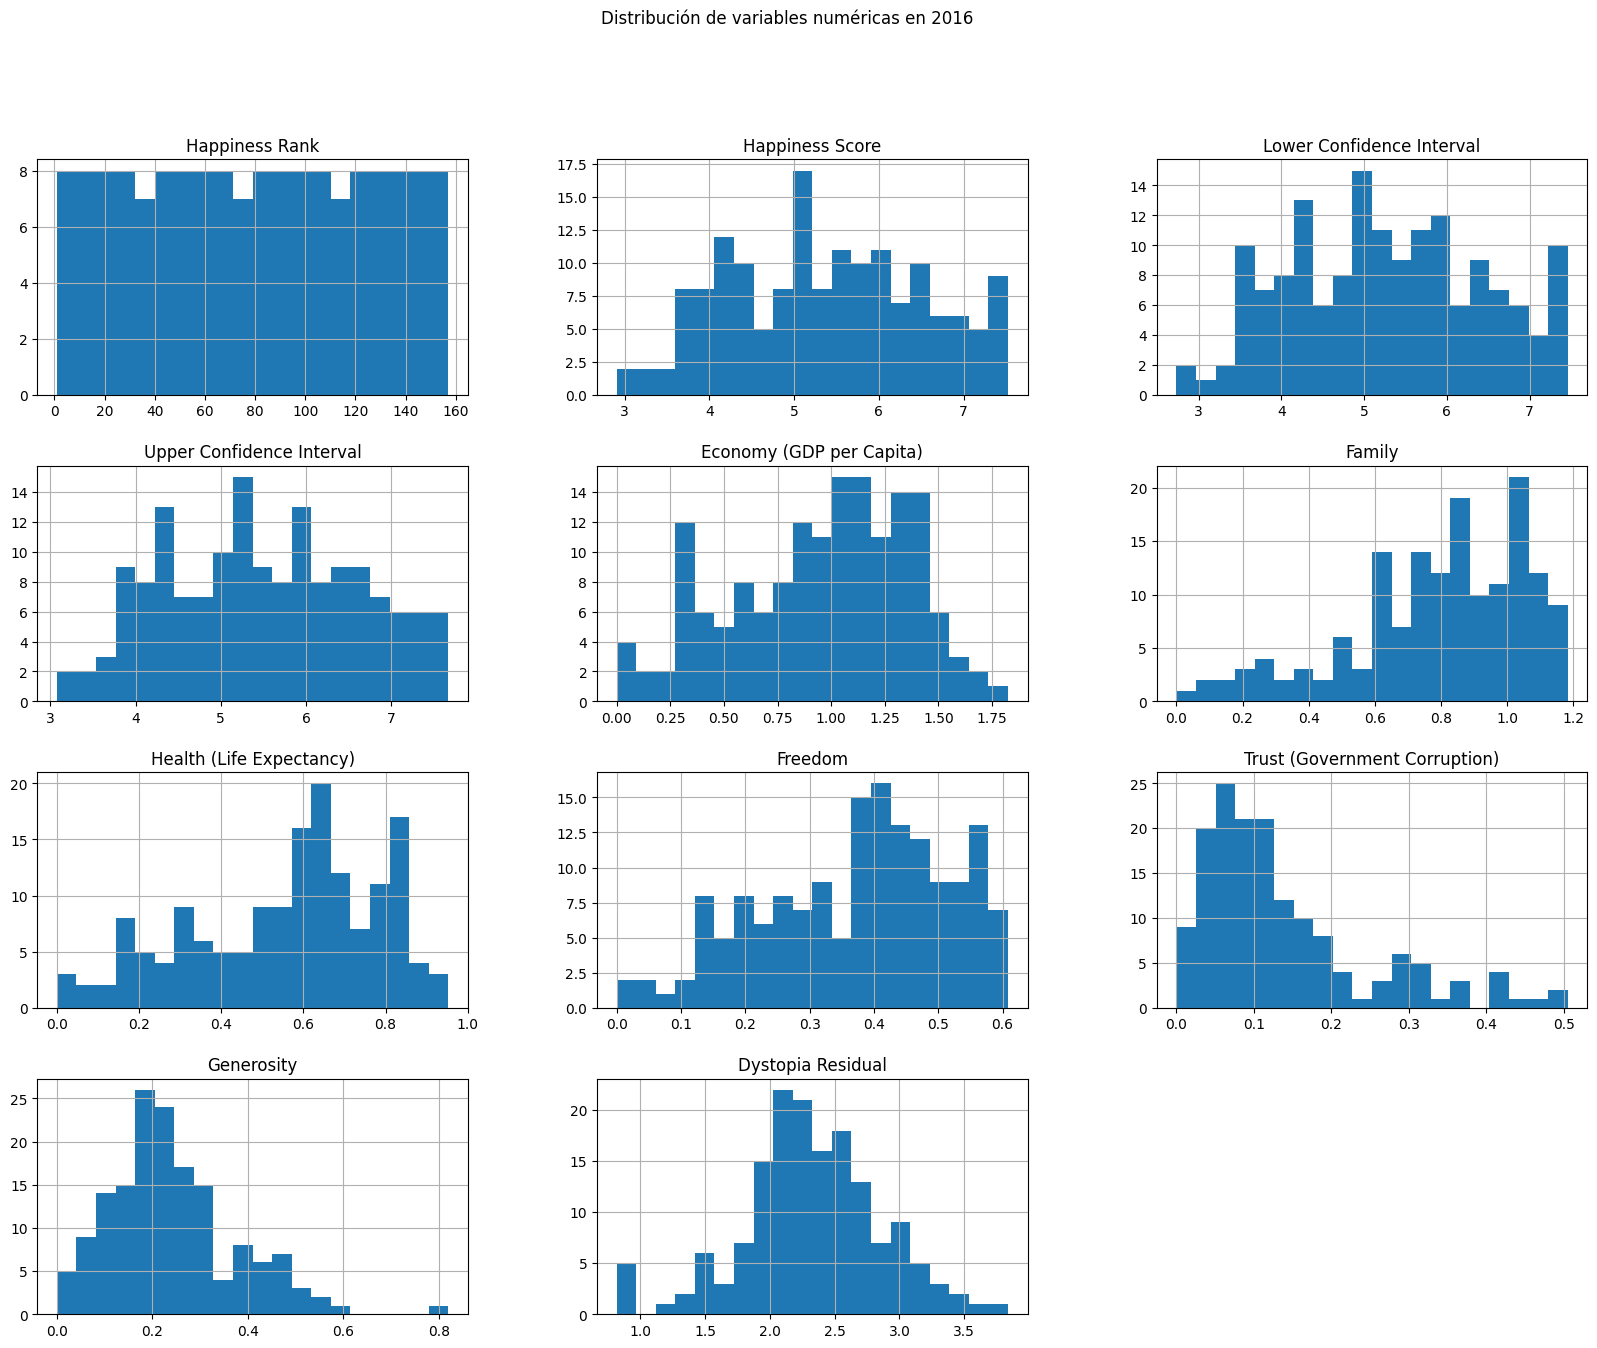

In [11]:
basic_stats_and_visuals(df_2016, "2016")

The 2016 World Happiness Report's histograms offer a clear and detailed look at well-being indicators from different countries. The happiness scores are slightly left-skewed, with most countries scoring between 4 and 6, indicating that moderate happiness levels are common. The upper and lower confidence intervals show similar distributions, suggesting consistent precision in these estimates. Economic prosperity (GDP per capita) and health outcomes (life expectancy) both display bimodal distributions, highlighting significant disparities among countries. Some countries cluster at higher wealth and health levels, while others are at lower levels, pointing to notable economic and health inequalities.

Family support scores also show a bimodal distribution, indicating diverse levels of family support. Freedom scores are left-skewed, with moderate freedom levels being more typical. Trust in government, as measured by perceived corruption, is right-skewed, suggesting lower trust levels are more prevalent. Generosity scores follow a similar right-skewed pattern, indicating lower levels of generosity are more common. The dystopia residual, which serves as a baseline measure, follows a normal distribution centered around 2.0, reflecting a balanced spread around the mean. These patterns collectively underscore the varied well-being and societal conditions across different nations.

Análisis estadístico básico para 2017:
       Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000    

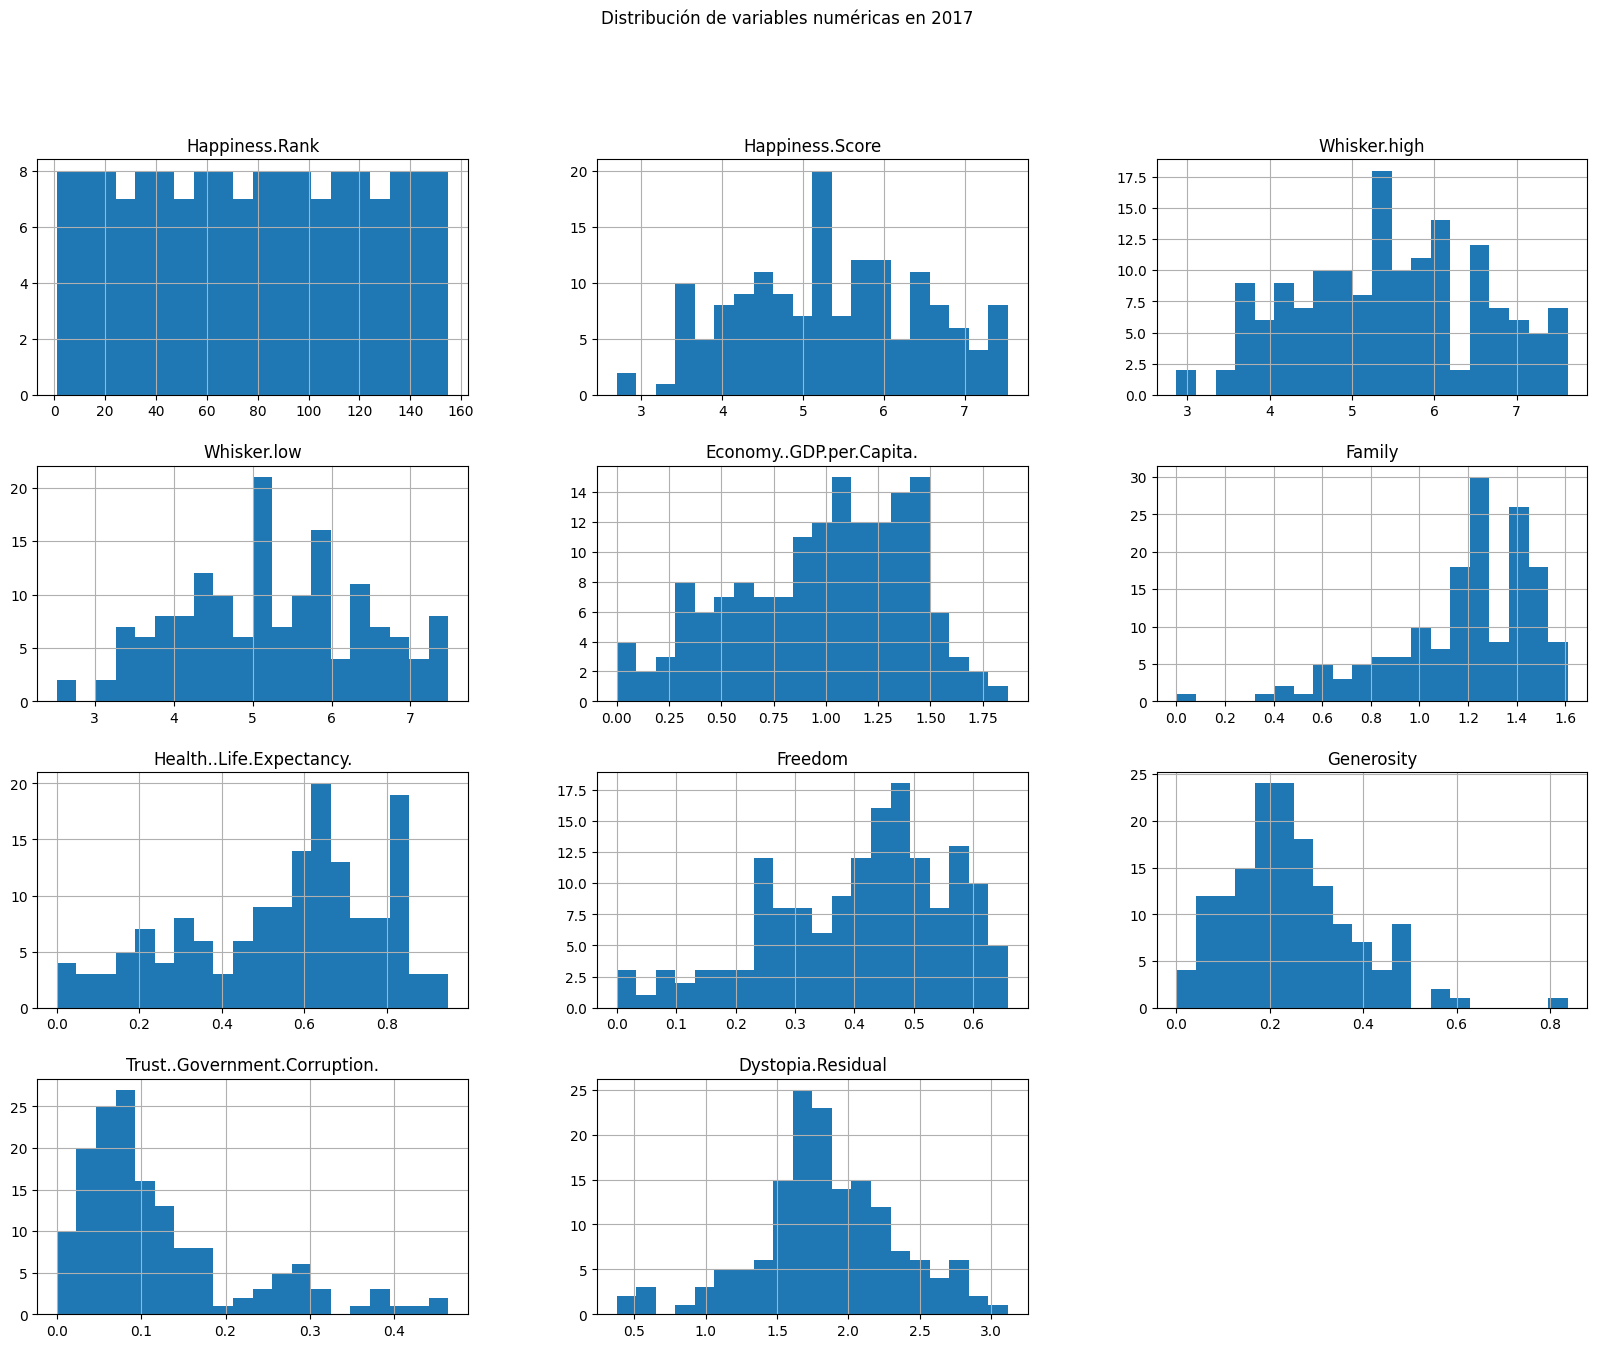

In [12]:
basic_stats_and_visuals(df_2017, "2017")

The analysis of the histograms in the World Happiness Report 2017 paints a picture of global well-being with both commonalities and variations. Happiness scores lean towards the left, with most countries clustered between 4 and 6. This suggests a general trend of moderate happiness globally. Interestingly, economic prosperity (GDP per capita) and health (life expectancy) show a different pattern. These distributions have two peaks, indicating a clear divide between wealthier and healthier nations and those facing greater challenges.

Family support follows a similar bimodal distribution, with some countries offering strong support systems while others struggle in this area. Freedom scores lean towards the left, suggesting that most countries fall within a moderate range of perceived freedom. Trust in government (measured by corruption) and generosity show the opposite trend, with right-skewed distributions. This means that lower trust and generosity are more common across the globe. Finally, the dystopia residual, a baseline measure, is normally distributed around 2.0. This indicates a balanced spread of well-being above a base level.

Análisis estadístico básico para 2018:
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0

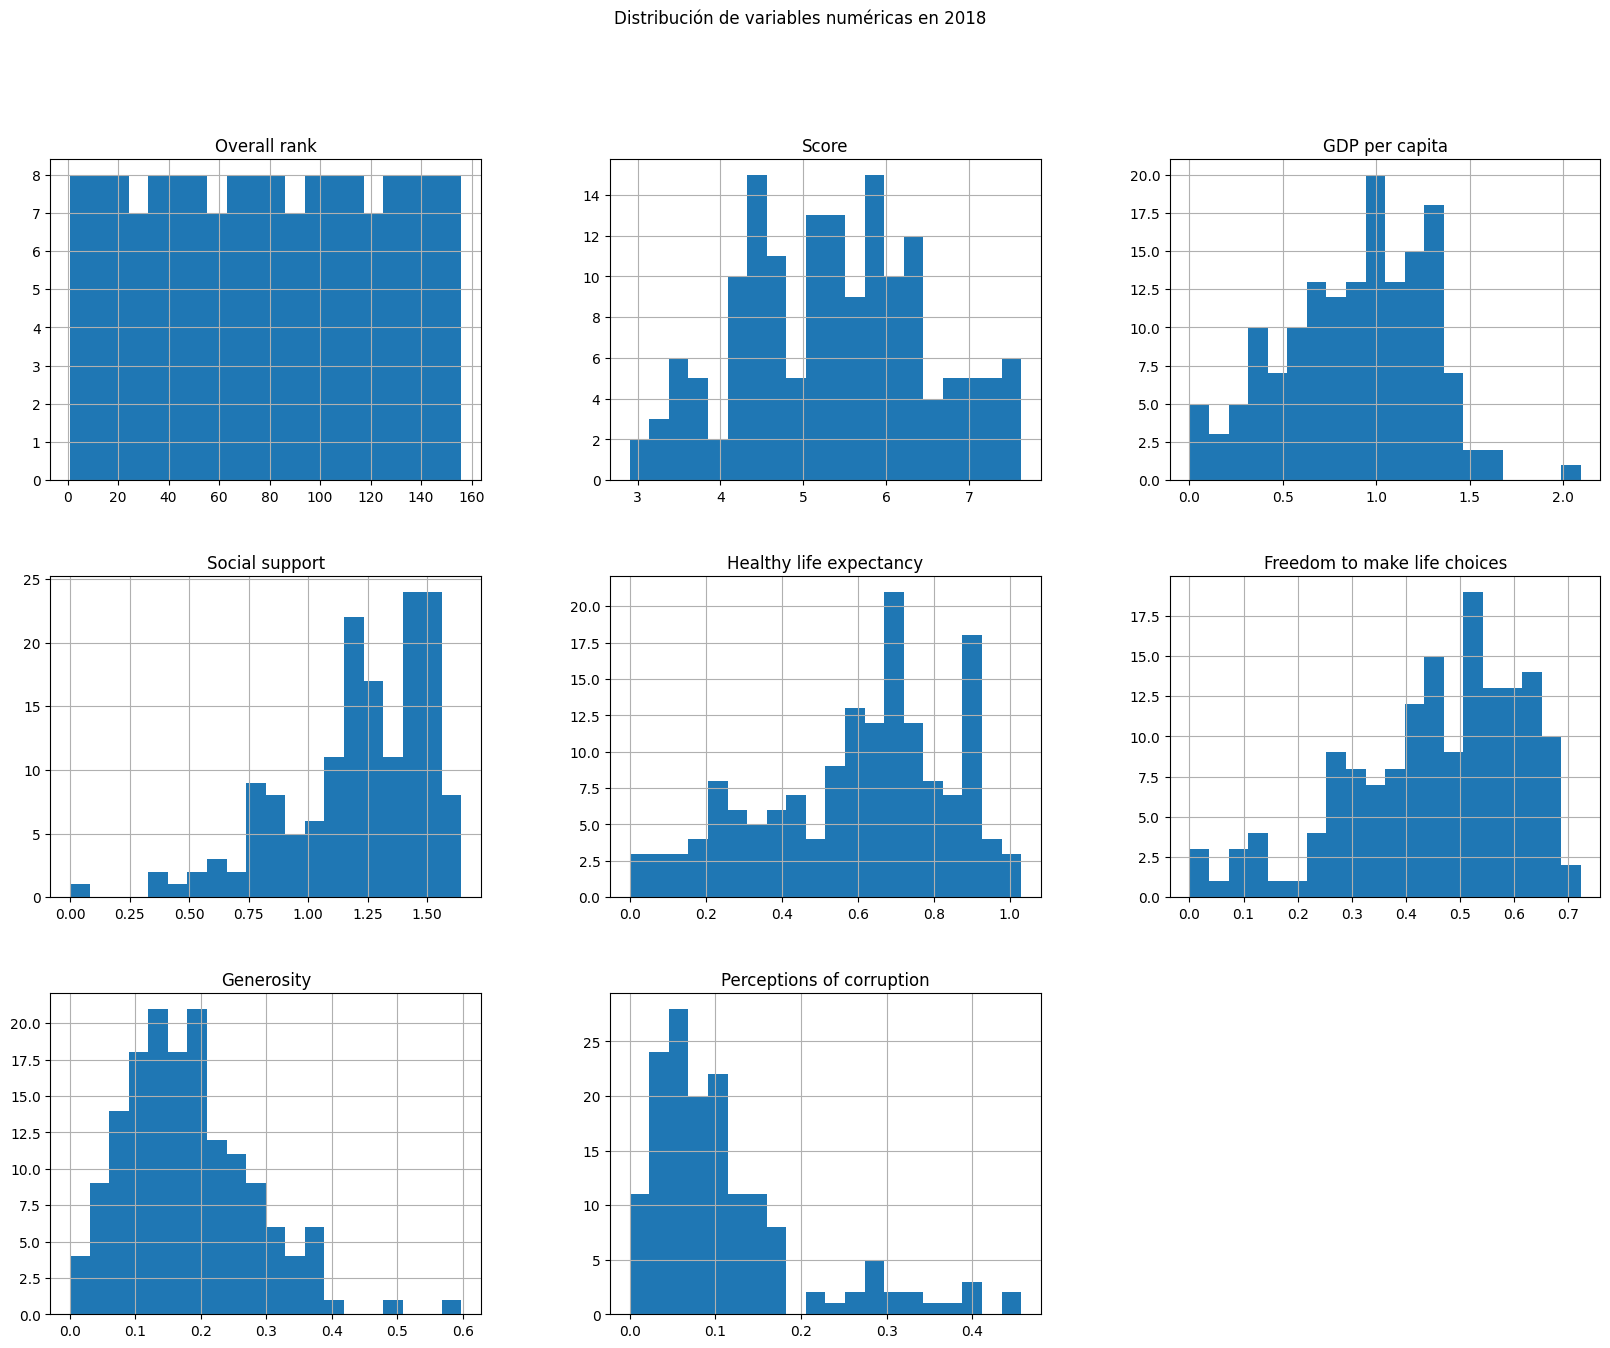

In [13]:
basic_stats_and_visuals(df_2018, "2018")

Delving into the World Happiness Report 2018, we encounter a treasure trove of data, meticulously presented in the form of histograms, that paint a vivid picture of the global well-being landscape. These histograms, far from being mere visual aids, serve as powerful tools for understanding the distribution of various well-being indicators across different countries.

Happiness, the cornerstone of well-being, takes center stage in the histograms, revealing a slight leftward skew. This intriguing pattern suggests that most countries reside within a moderate happiness range, between 4 and 6 on the happiness scale. While this indicates a global tendency towards moderate well-being, it also highlights the potential for further enhancement in this crucial aspect of human experience.

The pursuit of economic prosperity, as measured by GDP per capita, unveils a contrasting distribution in the histograms. Here, we witness a bimodal pattern, hinting at a stark divide between nations. On one side stand countries that have achieved remarkable economic success, while on the other, we find those facing significant economic challenges. This bimodal distribution underscores the uneven distribution of wealth across the globe, emphasizing the need for concerted efforts to bridge this gap.

Análisis estadístico básico para 2019:
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0

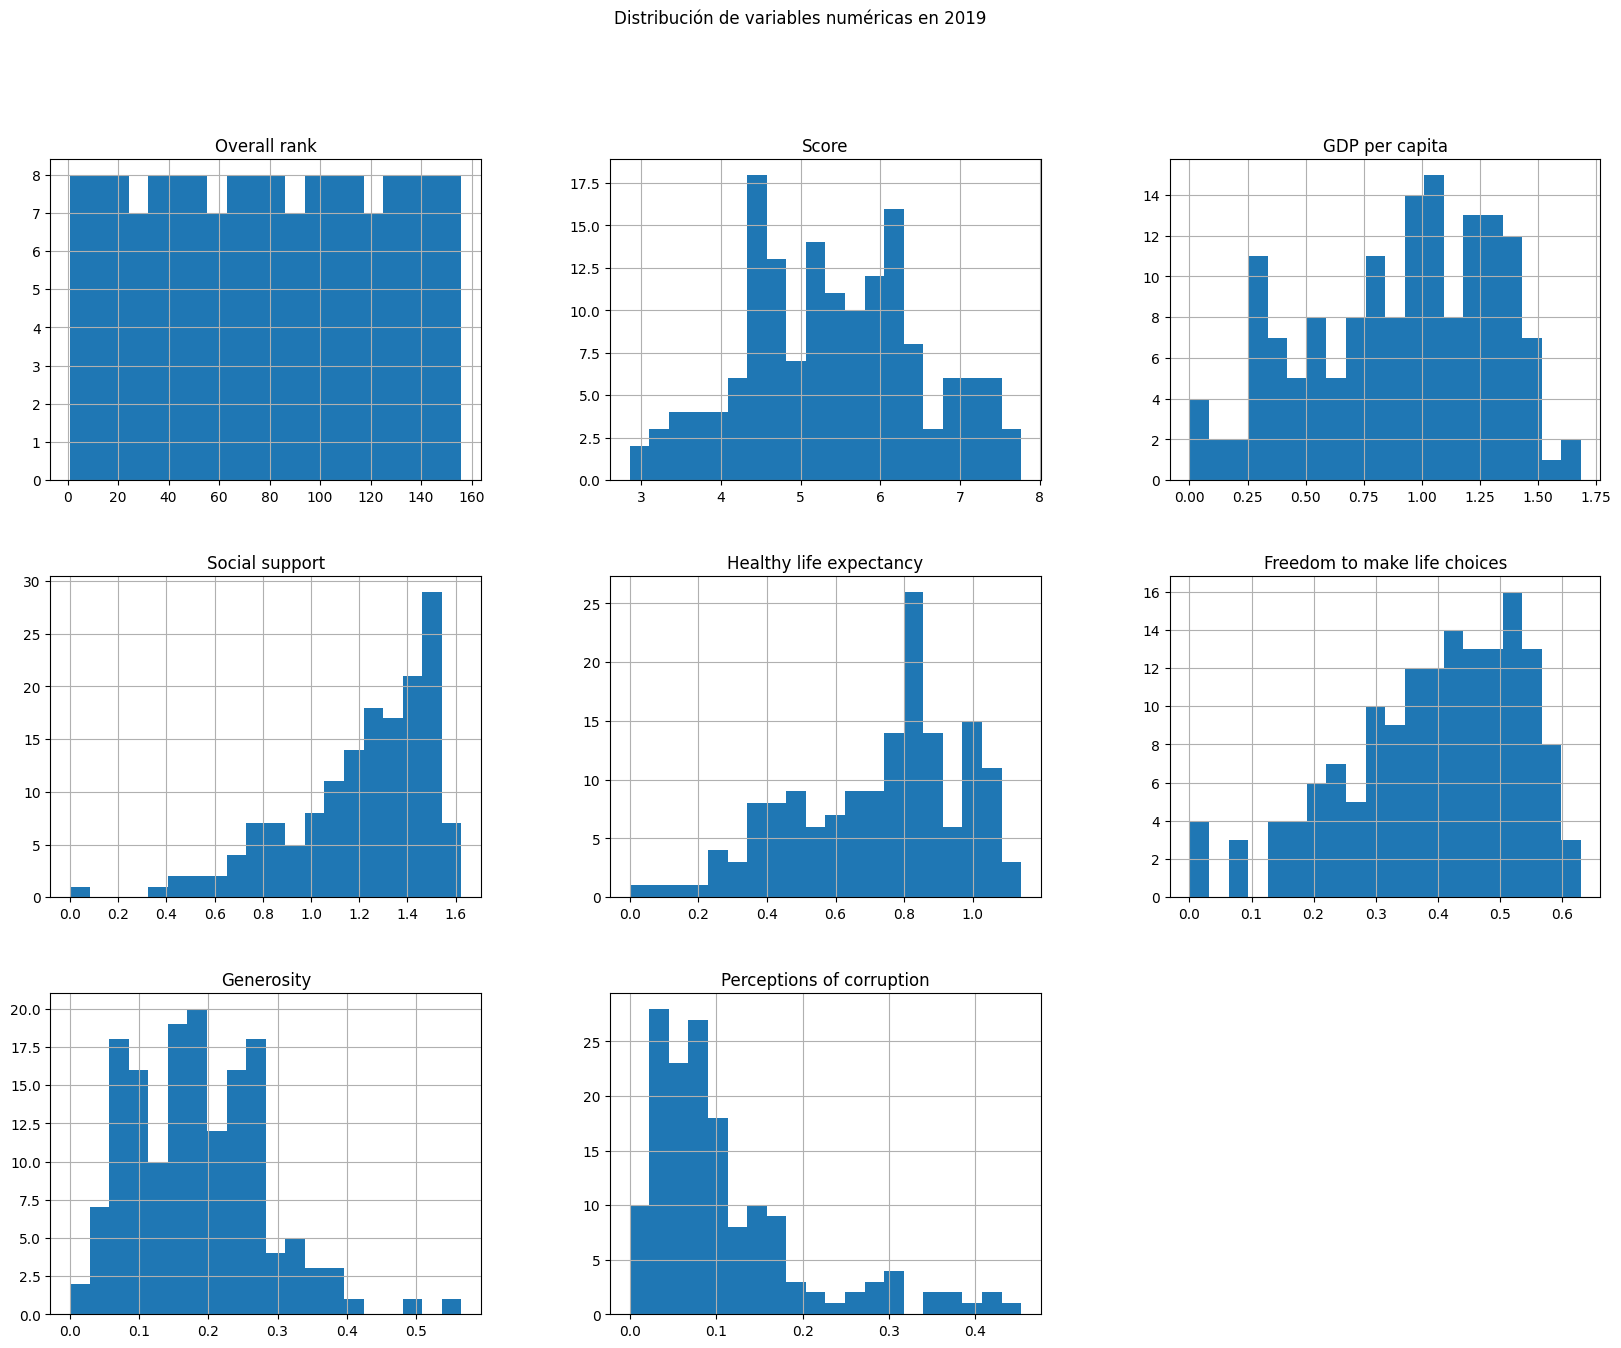

In [14]:
basic_stats_and_visuals(df_2019, "2019")

This World Happiness Report 2019 paints a picture of global well-being through histograms of key variables. The "Overall rank" distribution is fairly even, showing no single happiness level dominates. This suggests a global spread of happiness scores, with countries ranking across the spectrum.

The "Score" and "GDP per capita" histograms reveal a more centralized story. Most countries cluster around mid-range happiness scores (5-6) and a middle-ground GDP per capita (around $1). However, the tails of these distributions indicate some nations deviate significantly, with pockets of both higher and lower happiness and economic output.

Social aspects like "Social support," "Healthy life expectancy," and "Freedom to make life choices" show a different trend. These distributions skew towards the positive side. Many countries report high social support, long lifespans, and freedom of choice, but a lesser number fall on the other end of the spectrum.

Finally, "Generosity" and "Perceptions of corruption" offer unique insights. Generosity has a double peak, suggesting cultural or economic factors influence how countries view and practice generosity. "Perceptions of corruption" leans left, indicating most countries perceive low corruption, but a significant portion grapple with higher levels.

### **Let's Merge these datasets!**

Following the previous statistical overview, the columns common to all datasets are: Country, Happiness Score, GDP per Capita, Life Expectancy, Freedom, Generosity, and Trust/Government Corruption.

Before merging the datasets, we will remove the following columns: "Region", "Standard Error", "Family", "Dystopia Residual" and "Happiness Rank" from the 2015 dataset; "Region", "Lower Confidence Interval", "Upper Confidence Interval", "Family", "Dystopia Residual" and "Happiness Rank" from the 2016 dataset; "Whisker.high", "Whisker.low", "Family", "Dystopia.Residual" and "Happiness.Rank" from the 2017 dataset; "Overall rank" abd "Social support" from the 2018 dataset and finally "Overall rank" among with "Social support" from the 2018 dataset.

In [15]:
dataframes = {
    "2015": (df_2015, ["Region", "Standard Error", "Family", "Dystopia Residual", "Happiness Rank"]),
    "2016": (df_2016, ["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Family", "Dystopia Residual", "Happiness Rank"]),
    "2017": (df_2017, ["Whisker.high", "Whisker.low", "Family", "Dystopia.Residual", "Happiness.Rank"]),
    "2018": (df_2018, ["Overall rank", "Social support"]),
    "2019": (df_2019, ["Overall rank", "Social support"])
}

def remove_columns(df, columns):
    return df.drop(columns=columns, errors='ignore')

for year, (df, columns) in dataframes.items():
    df_cleaned = remove_columns(df, columns)
    dataframes[year] = df_cleaned
    print(f"Columnas restantes en {year}:")
    print(df_cleaned.columns)
    print()

df_2015, df_2016, df_2017, df_2018, df_2019 = dataframes["2015"], dataframes["2016"], dataframes["2017"], dataframes["2018"], dataframes["2019"]


Columnas restantes en 2015:
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

Columnas restantes en 2016:
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

Columnas restantes en 2017:
Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.'],
      dtype='object')

Columnas restantes en 2018:
Index(['Country or region', 'Score', 'GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Columnas restantes en 2019:
Index(['Country or region', 'Score', 'GDP per capita',
       'Healthy life expectancy', 'Freedom 

In [16]:
df_2015.head() 

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [17]:
df_2016.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


In [18]:
df_2017.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,7.537,1.616463,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,0.833552,0.627163,0.475540,0.153527
3,Switzerland,7.494,1.564980,0.858131,0.620071,0.290549,0.367007
4,Finland,7.469,1.443572,0.809158,0.617951,0.245483,0.382612


In [19]:
df_2018.head()

,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357


In [20]:
df_2019.head()

,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


The discarted columns have been deleted, now I'm going to add a new column called "year" for my reference, so I can see the year the result belongs to.

In [21]:
df_2015['year'] = 2015
df_2016['year'] = 2016
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

df_2015.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [22]:
df_2016.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Denmark,7.526,1.44178,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,7.509,1.52733,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,7.501,1.42666,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,7.498,1.57744,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,7.413,1.40598,0.81091,0.57104,0.41004,0.25492,2016


In [23]:
df_2017.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,year
0,Norway,7.537,1.616463,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,7.522,1.482383,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,7.504,1.480633,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,7.494,1.564980,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,7.469,1.443572,0.809158,0.617951,0.245483,0.382612,2017


In [24]:
df_2018.head()

,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.632,1.305,0.874,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,0.861,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,0.868,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,0.914,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357,2018


In [25]:
df_2019.head()

,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.769,1.340,0.986,0.596,0.153,0.393,2019
1,Denmark,7.600,1.383,0.996,0.592,0.252,0.410,2019
2,Norway,7.554,1.488,1.028,0.603,0.271,0.341,2019
3,Iceland,7.494,1.380,1.026,0.591,0.354,0.118,2019
4,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298,2019


#### Renaming and reorganizing columns

Now that we have the correct columns with the in all the datasets we need to rename them in all the datasets so we will have the correct name for the merge, let's do it!

**2015**

In [26]:
new_order = ['year', 'Country', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']

df_2015 = df_2015[new_order]

df_2015.head()

,year,Country,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


In [27]:
print(df_2015.columns)

Index(['year', 'Country', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Happiness Score'],
      dtype='object')


In [29]:
df_2015 = df_2015.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'corruption',
    'Happiness Score': 'happiness_score'
})

df_2015.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


**2016**

In [30]:
print(df_2016.columns)

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'year'],
      dtype='object')


In [31]:
new_order = ['year', 'Country', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']

df_2016 = df_2016[new_order]

df_2016.head()

,year,Country,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Score
0,2016,Denmark,1.44178,0.79504,0.57941,0.36171,0.44453,7.526
1,2016,Switzerland,1.52733,0.86303,0.58557,0.28083,0.41203,7.509
2,2016,Iceland,1.42666,0.86733,0.56624,0.47678,0.14975,7.501
3,2016,Norway,1.57744,0.79579,0.59609,0.37895,0.35776,7.498
4,2016,Finland,1.40598,0.81091,0.57104,0.25492,0.41004,7.413


In [32]:
df_2016 = df_2016.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'corruption',
    'Happiness Score': 'happiness_score'
})

df_2016.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2016,Denmark,1.44178,0.79504,0.57941,0.36171,0.44453,7.526
1,2016,Switzerland,1.52733,0.86303,0.58557,0.28083,0.41203,7.509
2,2016,Iceland,1.42666,0.86733,0.56624,0.47678,0.14975,7.501
3,2016,Norway,1.57744,0.79579,0.59609,0.37895,0.35776,7.498
4,2016,Finland,1.40598,0.81091,0.57104,0.25492,0.41004,7.413


**2017**

In [33]:
print(df_2017.columns)

Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'year'],
      dtype='object')


In [36]:
new_order = ['year', 'Country', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Happiness.Score']

df_2017 = df_2017[new_order]

df_2017.head()

,year,Country,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Happiness.Score
0,2017,Norway,1.616463,0.796667,0.635423,0.362012,0.315964,7.537
1,2017,Denmark,1.482383,0.792566,0.626007,0.355280,0.400770,7.522
2,2017,Iceland,1.480633,0.833552,0.627163,0.475540,0.153527,7.504
3,2017,Switzerland,1.564980,0.858131,0.620071,0.290549,0.367007,7.494
4,2017,Finland,1.443572,0.809158,0.617951,0.245483,0.382612,7.469


In [37]:
df_2016 = df_2016.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'Health..Life.Expectancy.': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust..Government.Corruption.': 'corruption',
    'Happiness.Score': 'happiness_score'
})

df_2016.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2016,Denmark,1.44178,0.79504,0.57941,0.36171,0.44453,7.526
1,2016,Switzerland,1.52733,0.86303,0.58557,0.28083,0.41203,7.509
2,2016,Iceland,1.42666,0.86733,0.56624,0.47678,0.14975,7.501
3,2016,Norway,1.57744,0.79579,0.59609,0.37895,0.35776,7.498
4,2016,Finland,1.40598,0.81091,0.57104,0.25492,0.41004,7.413


**2018**

In [39]:
print(df_2018.columns)

Index(['Country or region', 'Score', 'GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')


In [41]:
new_order = ['year', 'Country or region', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']

df_2018 = df_2018[new_order]

df_2018.head()

,year,Country or region,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score
0,2018,Finland,1.305,0.874,0.681,0.202,0.393,7.632
1,2018,Norway,1.456,0.861,0.686,0.286,0.340,7.594
2,2018,Denmark,1.351,0.868,0.683,0.284,0.408,7.555
3,2018,Iceland,1.343,0.914,0.677,0.353,0.138,7.495
4,2018,Switzerland,1.420,0.927,0.660,0.256,0.357,7.487


In [42]:
df_2018 = df_2018.rename(columns={
    'year': 'year',
    'Country or region': 'country',
    'GDP per capita': 'gdp_per_capita',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption',
    'Score': 'happiness_score'
})

df_2018.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2018,Finland,1.305,0.874,0.681,0.202,0.393,7.632
1,2018,Norway,1.456,0.861,0.686,0.286,0.340,7.594
2,2018,Denmark,1.351,0.868,0.683,0.284,0.408,7.555
3,2018,Iceland,1.343,0.914,0.677,0.353,0.138,7.495
4,2018,Switzerland,1.420,0.927,0.660,0.256,0.357,7.487


**2019**

In [43]:
print(df_2019.columns)

Index(['Country or region', 'Score', 'GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')


In [44]:
new_order = ['year', 'Country or region', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']

df_2019 = df_2019[new_order]

df_2019.head()

,year,Country or region,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score
0,2019,Finland,1.340,0.986,0.596,0.153,0.393,7.769
1,2019,Denmark,1.383,0.996,0.592,0.252,0.410,7.600
2,2019,Norway,1.488,1.028,0.603,0.271,0.341,7.554
3,2019,Iceland,1.380,1.026,0.591,0.354,0.118,7.494
4,2019,Netherlands,1.396,0.999,0.557,0.322,0.298,7.488


In [45]:
df_2019 = df_2019.rename(columns={
    'year': 'year',
    'Country or region': 'country',
    'GDP per capita': 'gdp_per_capita',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption',
    'Score': 'happiness_score'
})

df_2019.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2019,Finland,1.340,0.986,0.596,0.153,0.393,7.769
1,2019,Denmark,1.383,0.996,0.592,0.252,0.410,7.600
2,2019,Norway,1.488,1.028,0.603,0.271,0.341,7.554
3,2019,Iceland,1.380,1.026,0.591,0.354,0.118,7.494
4,2019,Netherlands,1.396,0.999,0.557,0.322,0.298,7.488


### Concatenation

In [46]:
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [50]:
df_all

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score,Country,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Happiness.Score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,0.35900,0.61400,0.55500,0.21700,0.41100,3.334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,2019,Tanzania,0.47600,0.49900,0.41700,0.27600,0.14700,3.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,2019,Afghanistan,0.35000,0.36100,0.00000,0.15800,0.02500,3.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,2019,Central African Republic,0.02600,0.10500,0.22500,0.23500,0.03500,3.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
